# Importing required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data/train_data_complete.csv")

In [3]:
print(data.shape)
data.head()

(762, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


#  Preprocessing 

In [4]:
data.timestamp = pd.to_datetime(data['Date'],format='%Y-%m-%d')
data.index = data.timestamp

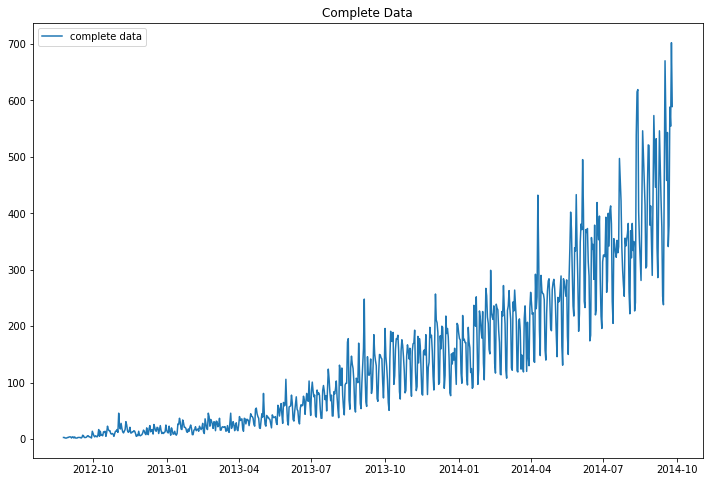

In [5]:
plt.figure(figsize=(12,8))

plt.plot(data.index, data['count'], label='complete data')
plt.legend(loc='best')
plt.title("Complete Data")
plt.show()

In [6]:
data.Date.min(), data.Date.max()

('2012-08-25', '2014-09-25')

# Hold-out Validation

In [7]:
train_data = data[:578]
valid_data = data[578:]

In [8]:
print(train_data.shape), print(valid_data.shape)

(578, 2)
(184, 2)


(None, None)

In [9]:
train_data.tail()

,Date,count
Date,,
2014-03-21,2014-03-21,149
2014-03-22,2014-03-22,129
2014-03-23,2014-03-23,119
2014-03-24,2014-03-24,214
2014-03-25,2014-03-25,236


In [10]:
valid_data.head()

,Date,count
Date,,
2014-03-26,2014-03-26,198
2014-03-27,2014-03-27,120
2014-03-28,2014-03-28,207
2014-03-29,2014-03-29,145
2014-03-30,2014-03-30,130


In [11]:
valid_data.tail()

,Date,count
Date,,
2014-09-21,2014-09-21,379
2014-09-22,2014-09-22,588
2014-09-23,2014-09-23,554
2014-09-24,2014-09-24,702
2014-09-25,2014-09-25,589


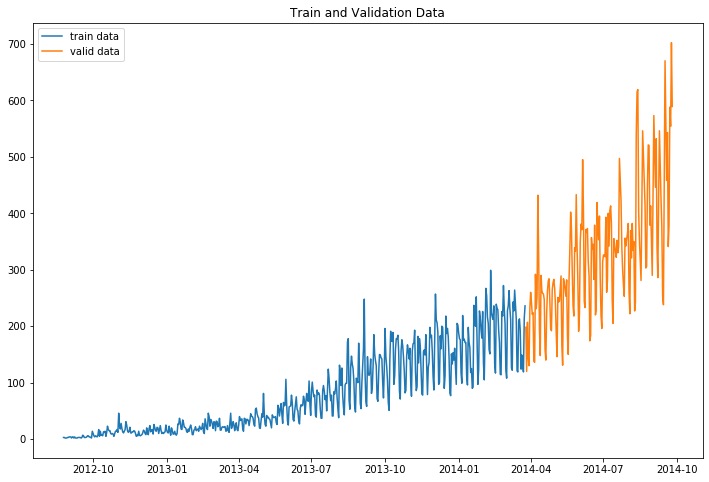

In [12]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train data')
plt.plot(valid_data.index, valid_data['count'], label='valid data')

plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

# Time Series Cross Validation

In [13]:
from sklearn.model_selection import TimeSeriesSplit

In [14]:
time_series_cv = TimeSeriesSplit(n_splits=5)
print(time_series_cv)

TimeSeriesSplit(max_train_size=None, n_splits=5)


In [15]:
for train_index, test_index in time_series_cv.split(data):
    print('----- ----- ----')
    print("TRAIN:", train_index[0], 'to', train_index[-1])
    print("TEST:", test_index[0], 'to', test_index[-1])

----- ----- ----
TRAIN: 0 to 126
TEST: 127 to 253
----- ----- ----
TRAIN: 0 to 253
TEST: 254 to 380
----- ----- ----
TRAIN: 0 to 380
TEST: 381 to 507
----- ----- ----
TRAIN: 0 to 507
TEST: 508 to 634
----- ----- ----
TRAIN: 0 to 634
TEST: 635 to 761


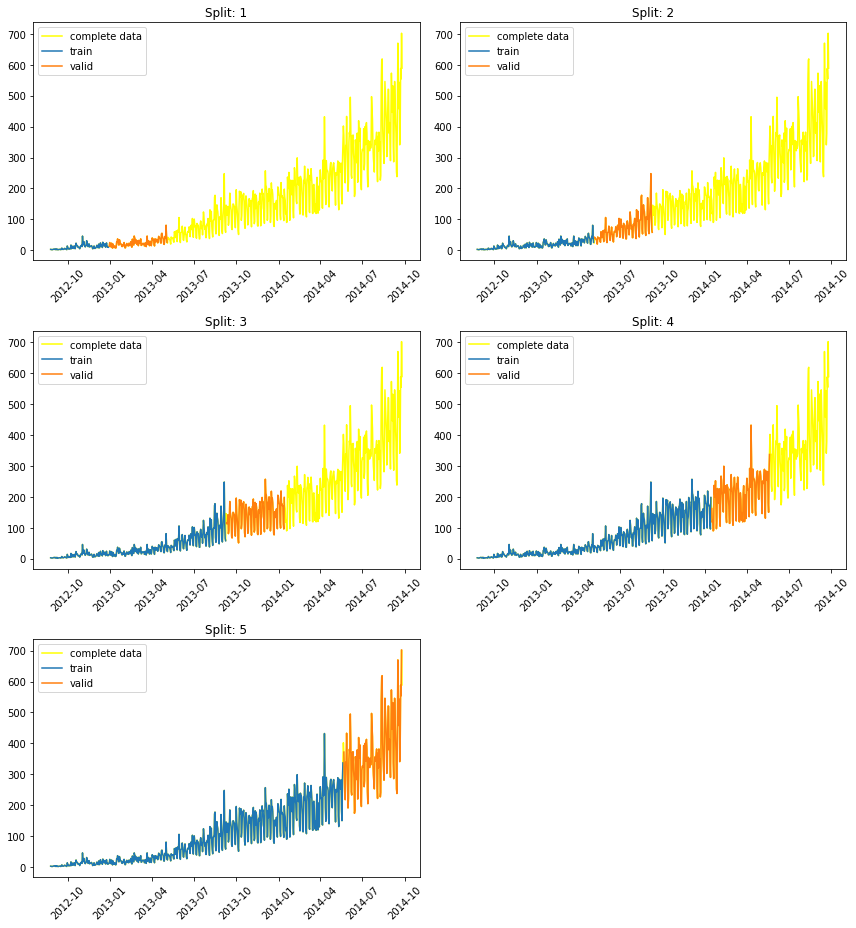

In [16]:
plt.figure(figsize=(12,13))
i=1
for train_index, test_index in time_series_cv.split(data):
    
    plt.subplot(3,2,i)
    
    plt.title("Split: " + str(i))
    plt.plot(data.index, data['count'], label='complete data', color='yellow')

    plt.plot(data[train_index[0]:train_index[-1]].index,data['count'][train_index[0]:train_index[-1]],label='train')
    plt.plot(data[test_index[0]:test_index[-1]].index,data['count'][test_index[0]:test_index[-1]],label='valid')
    
    plt.xticks(rotation=45)
    plt.legend(loc='best')
    plt.tight_layout()
    
    i+=1
    

# Walk Forward Cross Validation

In [17]:
for train_index, test_index in time_series_cv.split(data):
    print('----- ----- ----')
    print("TRAIN:", train_index[-1]-126, 'to', train_index[-1])
    print("TEST:", test_index[-1]-126, 'to', test_index[-1])

----- ----- ----
TRAIN: 0 to 126
TEST: 127 to 253
----- ----- ----
TRAIN: 127 to 253
TEST: 254 to 380
----- ----- ----
TRAIN: 254 to 380
TEST: 381 to 507
----- ----- ----
TRAIN: 381 to 507
TEST: 508 to 634
----- ----- ----
TRAIN: 508 to 634
TEST: 635 to 761


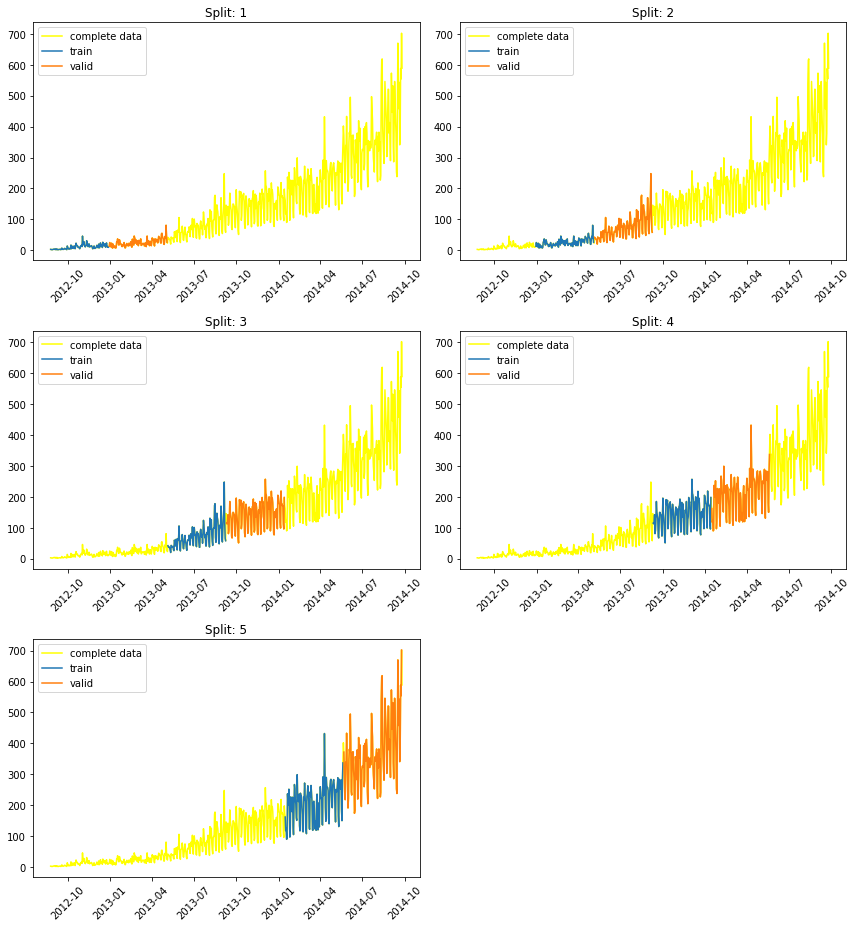

In [18]:
plt.figure(figsize=(12,13))
i=1

for train_index, test_index in time_series_cv.split(data):
    
    plt.subplot(3,2,i)
    
    plt.plot(data.index, data['count'], label='complete data', color='yellow')

    plt.plot(data[(train_index[-1]-126):train_index[-1]].index,data['count'][train_index[-1]-126:train_index[-1]],label='train')
    plt.plot(data[(test_index[-1]-126):test_index[-1]].index,data['count'][test_index[-1]-126:test_index[-1]],label='valid')
    
    plt.title("Split: " + str(i))
    plt.xticks(rotation=45)
    plt.legend(loc='best')
    plt.tight_layout()
    
    i+=1